In [ ]:
# Install needed packages
!pip install -q tensorflow opencv-python-headless

# Import libraries
import cv2
import os
import numpy as np
import time
from IPython.display import Javascript, display, clear_output
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io


In [ ]:
# Function to capture image from webcam
def capture_image():
    display(Javascript('''
        async function capture() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📷 Capture Image';
          div.appendChild(capture);
          document.body.appendChild(div);

          const video = document.createElement('video');
          video.style.display = 'block';
          document.body.appendChild(video);

          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          video.srcObject = stream;
          await video.play();

          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          video.remove();
          div.remove();

          return canvas.toDataURL('image/jpeg');
        }
        capture();
    '''))
    data = eval_js("capture()")
    binary = b64decode(data.split(',')[1])
    img = PIL.Image.open(io.BytesIO(binary))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


In [ ]:
gesture = "God"

save_dir = f'/content/gesture_dataset/{gesture}'
os.makedirs(save_dir, exist_ok=True)

for i in range(25):
    print(f"Capturing {gesture} image {i+1}")
    img = capture_image()
    img = cv2.resize(img, (64, 64))
    filename = os.path.join(save_dir, f'{gesture}_{i}.jpg')
    cv2.imwrite(filename, img)
    print(f"Saved {filename}")
    time.sleep(0.5)
    clear_output(wait=True)

Capturing God image 25


<IPython.core.display.Javascript object>

Saved /content/gesture_dataset/God/God_24.jpg


In [ ]:
gesture = "Loves"

save_dir = f'/content/gesture_dataset/{gesture}'
os.makedirs(save_dir, exist_ok=True)

for i in range(25):
    print(f"Capturing {gesture} image {i+1}")
    img = capture_image()
    img = cv2.resize(img, (64, 64))
    filename = os.path.join(save_dir, f'{gesture}_{i}.jpg')
    cv2.imwrite(filename, img)
    print(f"Saved {filename}")
    time.sleep(0.5)
    clear_output(wait=True)


Capturing Loves image 25


<IPython.core.display.Javascript object>

Saved /content/gesture_dataset/Loves/Loves_24.jpg


In [ ]:
gesture = "You"

save_dir = f'/content/gesture_dataset/{gesture}'
os.makedirs(save_dir, exist_ok=True)

for i in range(25):
    print(f"Capturing {gesture} image {i+1}")
    img = capture_image()
    img = cv2.resize(img, (64, 64))
    filename = os.path.join(save_dir, f'{gesture}_{i}.jpg')
    cv2.imwrite(filename, img)
    print(f"Saved {filename}")
    time.sleep(0.5)
    clear_output(wait=True)


Capturing You image 25


<IPython.core.display.Javascript object>

Saved /content/gesture_dataset/You/You_24.jpg


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

img_size = 64  # Matches the size you resized to earlier

# Data preprocessing
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data (80%)
train_data = train_gen.flow_from_directory(
    '/content/gesture_dataset',
    target_size=(img_size, img_size),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Validation data (20%)
val_data = train_gen.flow_from_directory(
    '/content/gesture_dataset',
    target_size=(img_size, img_size),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, validation_data=val_data, epochs=10)

# Save the model
model.save('gesture_model.h5')


Found 60 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.2562 - loss: 1.8460 - val_accuracy: 0.3333 - val_loss: 1.1511
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2616 - loss: 1.1861 - val_accuracy: 0.3333 - val_loss: 1.0649
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.4102 - loss: 1.0535 - val_accuracy: 0.7333 - val_loss: 1.0243
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6951 - loss: 1.0048 - val_accuracy: 0.6667 - val_loss: 0.9313
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7035 - loss: 0.8920 - val_accuracy: 1.0000 - val_loss: 0.7947
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8632 - loss: 0.7754 - val_accuracy: 1.0000 - val_loss: 0.6582
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9302 - loss: 0.5974 - val_accuracy: 0.9333 - val_loss: 0.5558
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted: Loves (49.54%)


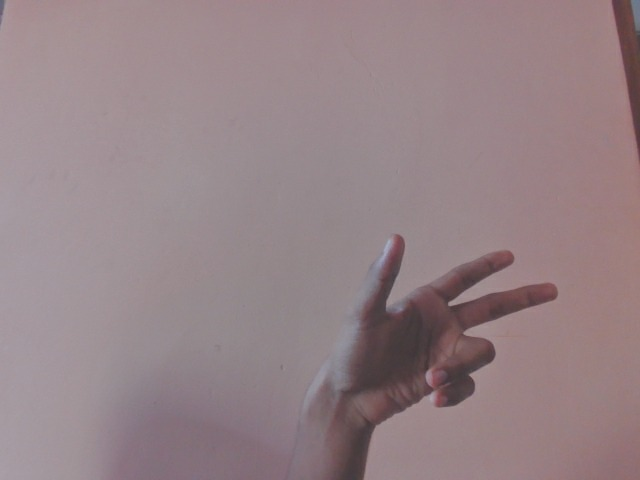

In [49]:
from tensorflow.keras.models import load_model

model = load_model('gesture_model.h5')

# Get class labels
class_names = list(train_data.class_indices.keys())

# Capture image
img = capture_image()
img_resized = cv2.resize(img, (64, 64))
input_img = np.expand_dims(img_resized, axis=0) / 255.0

# Predict
prediction = model.predict(input_img)
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

print(f"Predicted: {predicted_class} ({confidence:.2f}%)")
cv2_imshow(img)
